In [364]:
import pandas as pd
import numpy as np
import re
from pymongo import MongoClient
from tqdm import trange 
from matplotlib import pyplot as plt
import os
# print(os.getcwd()) # 현재 디렉토리 위치 확인
# # 경로 지정
# os.chdir("/home/sundooedu/git/Crawling-ML-Project/")

%matplotlib inline

%config InlineBackend.figure_format = 'retina'
plt.rc("font", family="AppleGeothic")

client = MongoClient('mongodb://192.168.0.154:27017/')  # mongo 연결
mydb = client.mydb

board_info = mydb.board.find() # get Collection with find()

a = []
for info in board_info: # Cursor
    a.append(info['title'])
    
df = pd.DataFrame({"title": a})
    
# df.to_csv("naver_shopping_title.csv",index=False)

[nltk_data] Downloading package punkt to /home/sundooedu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 69300/69300 [00:05<00:00, 11727.98it/s]


In [483]:
df = df.drop_duplicates(["title"], keep="last") # 중복값 제거
df["title"] = df["title"].str.lower() # 파이썬은 대소문자를 구분하기 때문에 데이터 필터링을 위해 대문자를 모두 소문자로 변경

# 열 삭제
# df.drop([''], axis=1, inplace=True)

a = df.title.tolist() # 특정 칼럼만 리스트로 출력

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

stop_words = ['아무렇게나', '다', '게', '예컨대', '로', '나','도', '+']
# # stop_words = stop_words.split(' ')

word_tokens = []
for i in trange(len(a)):
    word_tokens.append(word_tokenize(a[i]))

result = [] 
for w in word_tokens: 
    if w not in stop_words: 
        result.append(w) 

# print(word_tokens) 
# print(result)

# print(word_tokens[7])
# print(result[7])

result1 = []            # 하나의 리스트화 & extend 함수(멤버 메서드) 이용하여 확장하기
for i in trange(len(result)):
    result1.extend(result[i])
result1

[nltk_data] Downloading package punkt to /home/sundooedu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 519/519 [00:00<00:00, 587225.19it/s]


['블랙푸드',
 '슈퍼푸드',
 '검정콩',
 '보리',
 '미숫가루',
 '식사대용',
 '선식',
 '강동상회',
 '귀리',
 '검은콩',
 '7곡',
 '미숫가루',
 '서리태가루',
 '팥가루',
 '저녁',
 '아침',
 '식사대용',
 '선식',
 '든든한',
 '한끼',
 '10병',
 '아침대용식',
 '식사대용',
 '선식',
 '미숫가루',
 '[',
 '청오',
 ']',
 '통곡물로',
 '볶아만든',
 '10곡',
 '미숫가루',
 '봉평촌',
 '국산',
 '메밀',
 '함유된',
 '메밀미숫가루',
 '900g',
 '귀리선식',
 '(',
 '국산',
 '귀리100',
 '%',
 ')',
 '미숫가루',
 ',',
 '선식',
 ',',
 '식사대용',
 '600g',
 '미숫가루',
 '유산균',
 '아침대용식',
 '간편식',
 '서리태검은콩',
 '검은깨흑미',
 '선식',
 '아침대용',
 '미숫가루',
 '국산',
 '검은깨',
 '흑임자',
 '율무선식',
 '식사대용',
 '미숫가루',
 '빈속에도',
 '속이',
 '편한',
 '참쑥',
 '함량',
 '35',
 '%',
 '쑥',
 '미숫가루',
 '선식',
 '300g',
 ',',
 '600g',
 '태광선식',
 '퀴노아',
 '10곡',
 '미숫가루',
 '20g',
 'x',
 '80ct',
 '[',
 '코스트코',
 ']',
 '바로',
 '볶아',
 '고소한',
 '흑임자',
 '검은콩',
 '미숫가루',
 '300g',
 '500g',
 '칠갑농산',
 '10곡',
 '미싯가루',
 '미숫가루',
 '1k',
 '청오',
 '유기농',
 '선식',
 '(',
 '맛있는',
 '곡물한잔',
 ',',
 '발아',
 '미숫가루',
 ',',
 '무농약',
 '미숫가루',
 ')',
 '국산검은콩',
 '쥐눈이콩',
 '들깨선식',
 '아침대용',
 '미숫가루',
 '유기농늘보리로',
 '만든',
 '[',
 '쪄서',
 '만든',
 '늘보리',
 

### tokenizng 후 워드클라우드 시각화

In [466]:
# !pip install wordcloud

stopwords = ['아무렇게나', '다', '게', '예컨대']

# stopwords = []

import numpy as np
from wordcloud import WordCloud, STOPWORDS   # 워드클라우드 함수화
from PIL import Image

alice_mask = np.array(Image.open("alice_mask.png")) # 워드클라우드 모형 수치화

# 폰트의 경우 경로 지정 必
def displaywordcloud (data=None, backgroundcolor='white', width=1280, height=768):
    wordcloud = WordCloud(
        font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
        mask = alice_mask,
        stopwords = stop_words,
        background_color = backgroundcolor,
        width = width, height = height).generate(data)
        
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show

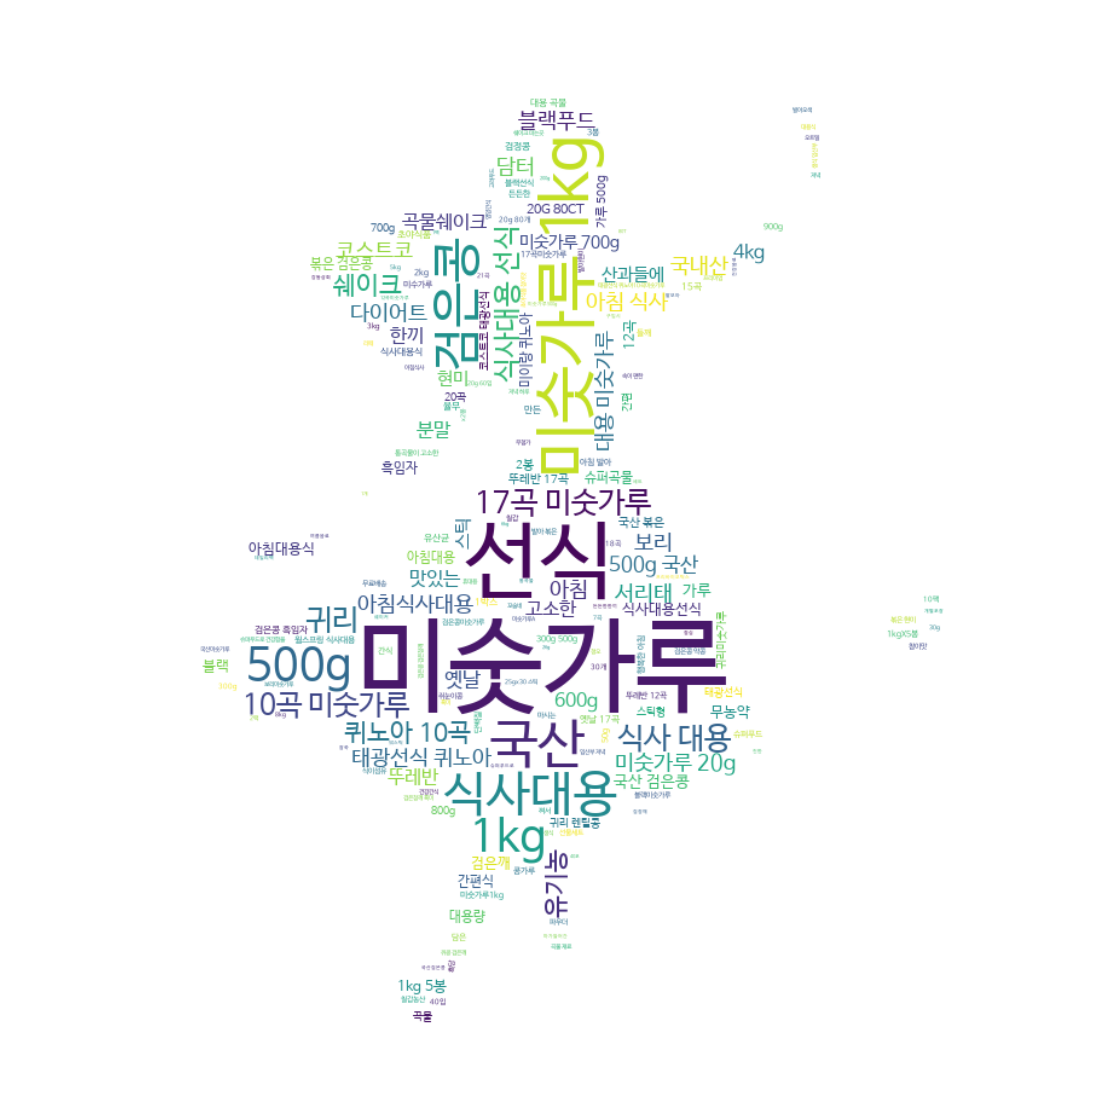

In [470]:
# result1에 리스트로 단어가 담겨 있음
course_text = " ".join(result1)
displaywordcloud(course_text)

### 해당 키워드를 포함하고 있는지 알려줌

In [479]:
search_keyword = ['슈퍼푸드','유기농','미숫가루']

for keyword in search_keyword:
    df[keyword] = df["title"].str.contains(keyword)

In [155]:
import pandas as pd
df_copy = df[df["title"].str.contains('검은콩')].copy()
df_copy.shape

(13484, 3)

In [1]:
# search_keyword = ['미숫가루']

# df[search_keyword].sum().sort_values(ascending=False)

In [244]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word",
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = None,
                            min_df = 1,
                            ngram_range = (4,15),
                            max_features = 70000
                            )
vectorizer

CountVectorizer(max_features=70000, ngram_range=(4, 15))

In [245]:
feature_vector = vectorizer.fit_transform(a)
feature_vector

<69300x6384 sparse matrix of type '<class 'numpy.int64'>'
	with 901905 stored elements in Compressed Sparse Row format>

In [246]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:99000]

6384


['050g 30팩 간편 건강한',
 '050g 30팩 간편 건강한 선식',
 '10 할인가 쉐이커 증정',
 '100 500g 검은콩 현미',
 '100 500g 검은콩 현미 보리',
 '100 500g 검은콩 현미 보리 검정깨',
 '100 500g 검은콩 현미 보리 검정깨 귀리',
 '100 500g 검은콩 현미 보리 검정깨 귀리 아침대용',
 '100 국내산 옛날 신림방앗간',
 '100 국내산 유기농 재료만',
 '100 국내산 유기농 재료만 담은',
 '100 국내산 유기농 재료만 담은 미숫가루',
 '100 국내산 유기농 재료만 담은 미숫가루 선식',
 '100 국내산 재료사용 아침대용음식',
 '100 국산 7곡 선식',
 '100 국산 7곡 선식 미숫가루500g',
 '100 국산 검은콩 미숫가루',
 '100 국산 검은콩 미숫가루 700g',
 '100 국산 검은콩 미숫가루 700g 2팩',
 '100 국산 검은콩검은깨 선식',
 '100 국산 검은콩검은깨 선식 식사대용',
 '100 국산 검은콩검은깨 선식 식사대용 미숫가루',
 '100 국산 블랙선식 검은선식',
 '100 국산 블랙선식 검은선식 블랙미숫가루',
 '100 국산 블랙선식 검은선식 블랙미숫가루 500g',
 '100 미숫가루 10곡 1kg',
 '100 미숫가루 선식 다섯가루',
 '100 미숫가루 선식 다섯가루 500g',
 '100 미숫가루 쉐이크 500g',
 '10곡 20g 80스틱 코스트코',
 '10곡 20g 80스틱 코스트코 선식',
 '10곡 다이어트 식사 대용',
 '10곡 다이어트 식사 대용 미숫가루',
 '10곡 다이어트 식사 대용 미숫가루 개별포장',
 '10곡 다이어트 식사 대용 미숫가루 개별포장 80개',
 '10곡 미숫가루 1kg 선식',
 '10곡 미숫가루 1kg 선식 건강간식',
 '10곡 미숫가루 20g 80',
 '10곡 미숫가루 20g 80cr',
 '10곡 미숫가루 20g 80cr 코스트코',
 '10곡 미숫가루 20g 80ct',
 '1

In [237]:
pd.DataFrame(feature_vector[:20].toarray(),columns=vocab).head()

,100 500g 검은콩 현미 보리 검정깨 귀리 아침대용,10곡 미숫가루 20gx80개 총1 6kg 간편다이어트 아침식사대용 선식,15곡 미숫가루 국산 선식 100 500g 검은콩 현미,15곡 미숫가루 국산 선식 100 500g 검은콩 현미 보리,15곡 미숫가루 국산 선식 100 500g 검은콩 현미 보리 검정깨,15곡 미숫가루 국산 선식 100 500g 검은콩 현미 보리 검정깨 귀리,15곡 미숫가루 국산 선식 100 500g 검은콩 현미 보리 검정깨 귀리 아침대용,15곡 미숫가루 미식분 곡슈퍼곡물 12곡 15곡 검은콩 검은참깨,15곡 미숫가루 미식분 곡슈퍼곡물 12곡 15곡 검은콩 검은참깨 흑미,17 곡물 옛날 미숫가루 1kg x5봉 라떼 쉐이크,...,흑미 선식 500g 국산 볶은 검은콩 흑임자 가루 아침 식사 대용,흑미 선식 500g 국산 볶은 검은콩 흑임자 가루 아침 식사 대용 미숫가루,흑임자 미숫가루 국산 통보리 약콩 귀리 흑임자 찰현미,흑임자 미숫가루 국산 통보리 약콩 귀리 흑임자 찰현미 아침대용,흑임자 미숫가루 국산 통보리 약콩 귀리 흑임자 찰현미 아침대용 선식,흑임자 미숫가루 국산 통보리 약콩 귀리 흑임자 찰현미 아침대용 선식 식사대용,흑임자 미숫가루 국산 통보리 약콩 귀리 흑임자 찰현미 아침대용 선식 식사대용 간식,흑임자가 국산 검정콩미숫가루 꼬숩네 렛츠블랙 데일리팩 15팩구입 1팩,흑임자가 국산 검정콩미숫가루 꼬숩네 렛츠블랙 큰팩 10개 구입시,흑임자가 국산 검정콩미숫가루 꼬숩네 렛츠블랙 큰팩 10개 구입시 1개
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
dist = np.sum(feature_vector, axis=0)

df_freq = pd.DataFrame(dist,columns=vocab)
df_freq

,100 500g 검은콩 현미 보리 검정깨 귀리 아침대용,10곡 미숫가루 20gx80개 총1 6kg 간편다이어트 아침식사대용 선식,15곡 미숫가루 국산 선식 100 500g 검은콩 현미,15곡 미숫가루 국산 선식 100 500g 검은콩 현미 보리,15곡 미숫가루 국산 선식 100 500g 검은콩 현미 보리 검정깨,15곡 미숫가루 국산 선식 100 500g 검은콩 현미 보리 검정깨 귀리,15곡 미숫가루 국산 선식 100 500g 검은콩 현미 보리 검정깨 귀리 아침대용,15곡 미숫가루 미식분 곡슈퍼곡물 12곡 15곡 검은콩 검은참깨,15곡 미숫가루 미식분 곡슈퍼곡물 12곡 15곡 검은콩 검은참깨 흑미,17 곡물 옛날 미숫가루 1kg x5봉 라떼 쉐이크,...,흑미 선식 500g 국산 볶은 검은콩 흑임자 가루 아침 식사 대용,흑미 선식 500g 국산 볶은 검은콩 흑임자 가루 아침 식사 대용 미숫가루,흑임자 미숫가루 국산 통보리 약콩 귀리 흑임자 찰현미,흑임자 미숫가루 국산 통보리 약콩 귀리 흑임자 찰현미 아침대용,흑임자 미숫가루 국산 통보리 약콩 귀리 흑임자 찰현미 아침대용 선식,흑임자 미숫가루 국산 통보리 약콩 귀리 흑임자 찰현미 아침대용 선식 식사대용,흑임자 미숫가루 국산 통보리 약콩 귀리 흑임자 찰현미 아침대용 선식 식사대용 간식,흑임자가 국산 검정콩미숫가루 꼬숩네 렛츠블랙 데일리팩 15팩구입 1팩,흑임자가 국산 검정콩미숫가루 꼬숩네 렛츠블랙 큰팩 10개 구입시,흑임자가 국산 검정콩미숫가루 꼬숩네 렛츠블랙 큰팩 10개 구입시 1개
0,140,140,140,140,140,140,140,140,140,140,...,140,140,139,139,139,139,139,140,141,141


In [239]:
df_freq.T.sort_values(by=0, ascending=False).head(100)

,0
임산부 아침 한끼 식사 대용 미숫가루 선식 식이섬유 맛있는 쉐이크,421
단백질 프로틴 여성 임산부 아침 한끼 식사 대용 미숫가루 선식 식이섬유 맛있는 쉐이크 보충제,421
단백질 프로틴 여성 임산부 아침 한끼 식사 대용 미숫가루 선식 식이섬유 맛있는,421
단백질 프로틴 여성 임산부 아침 한끼 식사 대용 미숫가루 선식 식이섬유,421
단백질 프로틴 여성 임산부 아침 한끼 식사 대용 미숫가루 선식,421
...,...
선식 식이섬유 맛있는 쉐이크 보충제 가루 분말 식단 셰이크,421
대용 미숫가루 선식 식이섬유 맛있는 쉐이크 보충제 가루 분말 식단 셰이크 파우더,421
프로틴 여성 임산부 아침 한끼 식사 대용 미숫가루 선식 식이섬유 맛있는 쉐이크 보충제 가루 분말,421
프로틴 여성 임산부 아침 한끼 식사 대용 미숫가루 선식 식이섬유 맛있는 쉐이크 보충제 가루,421


### 군집화

In [247]:
from sklearn.cluster import KMeans

inertia = []
start = 10
end = 50

for i in trange(start, end):
    cls = KMeans(n_clusters=i, random_state=42)
    cls.fit(feature_vector)
    inertia.append(cls.inertia_)

100%|██████████| 40/40 [04:11<00:00,  6.29s/it]


Text(0.5, 1.0, 'KMeans 클러스터 수 비교')

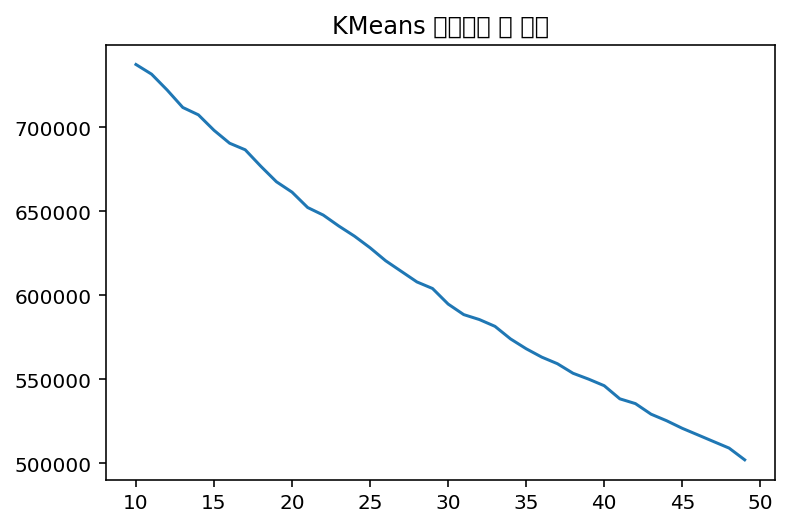

In [294]:
from matplotlib import pyplot as plt

plt.plot(range(start,end), inertia)
plt.title("KMeans 클러스터 수 비교")

In [296]:
n_clusters = 30
cls = KMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_vector)
predict = cls.predict(feature_vector)
df["cluster"] = predict

In [298]:
df["cluster"].value_counts().head(10)

4     61392
29     1964
6      1220
3       421
12      399
24      281
9       280
11      280
13      253
5       246
Name: cluster, dtype: int64

In [299]:
from sklearn.cluster import MiniBatchKMeans
b_ineritia = []

for i in trange(start, end):
    cls = MiniBatchKMeans(n_clusters=i, random_state=42)
    cls.fit(feature_vector)
    b_ineritia.append(cls.inertia_)

100%|██████████| 40/40 [00:22<00:00,  1.76it/s]


Text(0.5, 1.0, 'MiniBatchKMeans 클러스터 수 비교')

/home/sundooedu/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda/lib/python3.6/site-packages/matplotlib/backends/ba

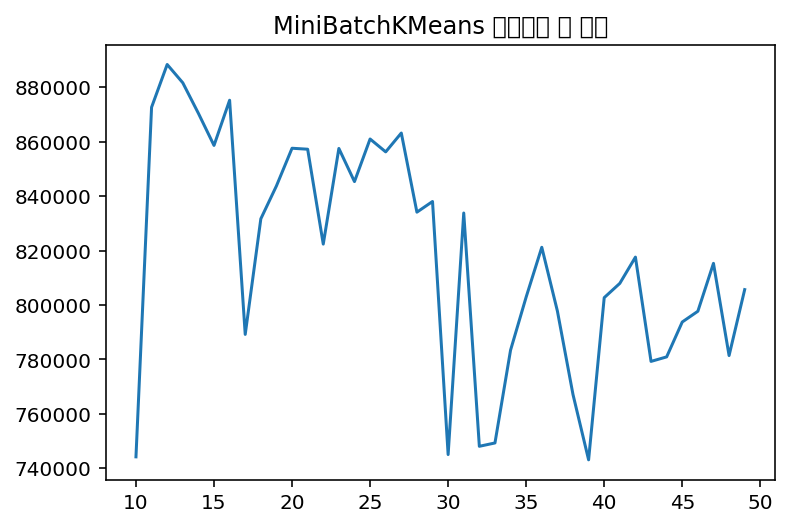

In [300]:
plt.plot(range(start,end), b_ineritia)
plt.title("MiniBatchKMeans 클러스터 수 비교")

In [301]:
cls = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_vector)
predict = cls.predict(feature_vector)
df["bcluster"] = predict

In [302]:
df["bcluster"].value_counts()

13    31182
19    23510
7      9626
25      560
16      421
10      420
2       281
18      279
15      279
8       253
24      252
28      221
29      203
21      141
9       141
4       140
6       140
1       140
0       140
11      140
17      140
23      140
26      140
3       130
20      103
14       88
5        83
22        7
Name: bcluster, dtype: int64